In [2]:
# Veri Temizleme
import pandas as pd
df = pd.read_csv("S&P 500 Historical.csv")
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%d/%m/%Y')  
df["Date"] = df['Unnamed: 0']
df_cleaned = df.dropna(subset=['SP500 status of AAPL'])

# Şirketlerin İsimlerini Toplama

# Kontol etmeden direkt kolon sayısından alırsak şirket sayısı 1175
status_cols = [col for col in df.columns if col.startswith("SP500 status of")]
ticker_list = [col.replace("SP500 status of ", "") for col in status_cols]
print(len(ticker_list))

# Hiç aktif olmuş mu diye kontol ederek alırsak şirket sayısı 1060
status_cols = [col for col in df.columns if col.startswith("SP500 status of")]
df_status = df[status_cols]
membership_bool = df_status.any(axis=0)
num_companies = membership_bool.sum()
print(f"2000'den günümüze S&P 500'de yer almış toplam farklı şirket sayısı: {num_companies}")
tickers_in_sp500 = [
    col.replace("SP500 status of ", "") 
    for col in membership_bool[membership_bool].index
]

# Aradaki farkın doğruluğunun testi
fark_liste1 = set(tickers_in_sp500) - set(ticker_list)
fark_liste2 = set(ticker_list) - set(tickers_in_sp500)
simetrik_fark = set(tickers_in_sp500).symmetric_difference(set(ticker_list))
for ticker in simetrik_fark:
    col_name = f"SP500 status of {ticker}"
    if col_name in df.columns:
        if df[col_name].eq(1).any():
            print(f"{col_name}: sütununda en az bir '1' değeri var.")
        else:
            pass
    else:
        print(f"{col_name} sütunu DataFrame'de mevcut değil.")


1175
2000'den günümüze S&P 500'de yer almış toplam farklı şirket sayısı: 1060


In [1]:
# Şirketlerin aktif oldukları dönemleri
active_periods = {}
for ticker in tickers_in_sp500:
    col_name = f"SP500 status of {ticker}"
    if col_name in df.columns:
        active_dates = df.loc[df[col_name] == 1, 'date']
        active_periods[ticker] = active_dates.tolist()
    else:
        active_periods[ticker] = []
for ticker, dates in active_periods.items():
    print(f"{ticker} aktif olduğu zamanlar: {dates}")

NameError: name 'tickers_in_sp500' is not defined

In [ ]:
# Çeyreklere ayırarak o çeyrekten itibaren olan şirketler (45 gün eklenmeden hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["quarter"] = df["date"].dt.to_period("Q")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
quarters = sorted(df["quarter"].unique())
results_q = {}
for q in quarters:
    start_date = q.start_time
    subset = df[df["date"] >= start_date]
    active_tickers = []
    for col in ticker_cols:
        if subset[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
        results_q[str(q)] = active_tickers
for quarter, tickers in results_q.items():
    print(f"{quarter} itibarıyla aktif şirketler ({len(tickers)} adet): {tickers}")

2000Q1 itibarıyla aktif şirketler (1060 adet): ['LKQ', 'SHW', 'AWK', 'BX', 'PALM', 'APOL', 'DHR', 'UPC', 'EOP', 'HPQ', 'PDCO', 'XOM', 'CITGQ', 'FDS', 'PARA', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'KSE', 'PPL', 'ADI', 'JOY', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'SNI', 'VZ', 'AAP', 'AOS', 'WPX', 'TDC', 'SNV', 'PDG', 'HRL', 'URBN', 'GOOGL', 'LO', 'ESV', 'EXC', 'RJF', 'HON', 'UTX', 'WRB', 'WLL', 'SJM', 'TER', 'FSL', 'NOVL', 'CDW', 'MAR', 'RAL', 'MMI', 'BALL', 'ANTM', 'MNK', 'CTXS', 'MBI', 'AABA', 'PRU', 'ARNC', 'UN', 'HRS', 'HD', 'OAT', 'HBAN', 'MYL', 'NGH', 'FLT', 'UAA', 'ALL', 'RHI', 'SII', 'WRK', 'WAB', 'MWW', 'OGN', 'DXCM', 'BEAM', 'NMK', 'ETFC', 'GENZ', 'PHA', 'AT', 'SWN', 'DVA', 'GTW', 'EIX', 'WAMUQ', 'CF', 'VIAV', 'MAS', 'H', 'HRB', 'FII', 'IBM', 'CBRE', 'CFN', 'UNM', 'BMY', 'SOV', 'MLM', 'MSCI', 'SPLS', 'NLOK', 'SBNY', 'MCK', 'JNJ', 'WST', 'AMCR', 'NEM', 'BLK', 'LUMN', 'TRGP', 'KSS', 'ACKH', 'AEP', 'STX', 'CMX', 'KMI', 'BG', 'GTE', 'UST', 'DFS', 'HCP', 'PWJ', 'FSH', 'VRTX', 'U

In [ ]:
# Çeyreklere ayırarak o çeyrekten itibaren olan şirketler (45 gün eklenerek hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["quarter"] = df["date"].dt.to_period("Q")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
quarters = sorted(df["quarter"].unique())
results_q = {}
for q in quarters:
    start_date = q.start_time + pd.Timedelta(days=45)
    subset = df[df["date"] >= start_date]
    active_tickers = []
    for col in ticker_cols:
        if subset[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_q[str(q)] = active_tickers
for quarter, tickers in results_q.items():
    print(f"{quarter} itibarıyla aktif şirketler ({len(tickers)} adet): {tickers}")

2000Q1 itibarıyla aktif şirketler (1056 adet): ['LKQ', 'SHW', 'AWK', 'BX', 'PALM', 'APOL', 'DHR', 'UPC', 'EOP', 'HPQ', 'PDCO', 'XOM', 'CITGQ', 'FDS', 'PARA', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'KSE', 'PPL', 'ADI', 'JOY', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'SNI', 'VZ', 'AAP', 'AOS', 'WPX', 'TDC', 'SNV', 'PDG', 'HRL', 'URBN', 'GOOGL', 'LO', 'ESV', 'EXC', 'RJF', 'HON', 'UTX', 'WRB', 'WLL', 'SJM', 'TER', 'FSL', 'NOVL', 'CDW', 'MAR', 'RAL', 'MMI', 'BALL', 'ANTM', 'MNK', 'CTXS', 'MBI', 'AABA', 'PRU', 'ARNC', 'UN', 'HRS', 'HD', 'OAT', 'HBAN', 'MYL', 'NGH', 'FLT', 'UAA', 'ALL', 'RHI', 'SII', 'WRK', 'WAB', 'MWW', 'OGN', 'DXCM', 'BEAM', 'NMK', 'ETFC', 'GENZ', 'PHA', 'AT', 'SWN', 'DVA', 'GTW', 'EIX', 'WAMUQ', 'CF', 'VIAV', 'MAS', 'H', 'HRB', 'FII', 'IBM', 'CBRE', 'CFN', 'UNM', 'BMY', 'SOV', 'MLM', 'MSCI', 'SPLS', 'NLOK', 'SBNY', 'MCK', 'JNJ', 'WST', 'AMCR', 'NEM', 'BLK', 'LUMN', 'TRGP', 'KSS', 'ACKH', 'AEP', 'STX', 'CMX', 'KMI', 'BG', 'GTE', 'UST', 'DFS', 'HCP', 'PWJ', 'FSH', 'VRTX', 'U

In [ ]:
# Yıllara ayırarak o yıldan itibaren olan şirketler (90 gün eklenmeden hesaplanmıştır)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year"] = df["date"].dt.to_period("Y")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
years = sorted(df["year"].unique())
results_year = {}
for y in years:
    start_date = y.start_time
    subset_year = df[df["date"] >= start_date]
    active_tickers = []
    for col in ticker_cols:
        if subset_year[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_year[str(y)] = active_tickers
for year, tickers in results_year.items():
    print(f"{year} itibarıyla aktif şirketler ({len(tickers)} adet): {tickers}")

2000 itibarıyla aktif şirketler (1060 adet): ['LKQ', 'SHW', 'AWK', 'BX', 'PALM', 'APOL', 'DHR', 'UPC', 'EOP', 'HPQ', 'PDCO', 'XOM', 'CITGQ', 'FDS', 'PARA', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'KSE', 'PPL', 'ADI', 'JOY', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'SNI', 'VZ', 'AAP', 'AOS', 'WPX', 'TDC', 'SNV', 'PDG', 'HRL', 'URBN', 'GOOGL', 'LO', 'ESV', 'EXC', 'RJF', 'HON', 'UTX', 'WRB', 'WLL', 'SJM', 'TER', 'FSL', 'NOVL', 'CDW', 'MAR', 'RAL', 'MMI', 'BALL', 'ANTM', 'MNK', 'CTXS', 'MBI', 'AABA', 'PRU', 'ARNC', 'UN', 'HRS', 'HD', 'OAT', 'HBAN', 'MYL', 'NGH', 'FLT', 'UAA', 'ALL', 'RHI', 'SII', 'WRK', 'WAB', 'MWW', 'OGN', 'DXCM', 'BEAM', 'NMK', 'ETFC', 'GENZ', 'PHA', 'AT', 'SWN', 'DVA', 'GTW', 'EIX', 'WAMUQ', 'CF', 'VIAV', 'MAS', 'H', 'HRB', 'FII', 'IBM', 'CBRE', 'CFN', 'UNM', 'BMY', 'SOV', 'MLM', 'MSCI', 'SPLS', 'NLOK', 'SBNY', 'MCK', 'JNJ', 'WST', 'AMCR', 'NEM', 'BLK', 'LUMN', 'TRGP', 'KSS', 'ACKH', 'AEP', 'STX', 'CMX', 'KMI', 'BG', 'GTE', 'UST', 'DFS', 'HCP', 'PWJ', 'FSH', 'VRTX', 'UHS

In [ ]:
# Yıllara ayırarak o yıldan itibaren olan şirketler (90 gün eklenerek hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year"] = df["date"].dt.to_period("Y")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
years = sorted(df["year"].unique())
results_year = {}
for y in years:
    start_date = y.start_time + pd.Timedelta(days=90)
    subset_year = df[df["date"] >= start_date]
    active_tickers = []
    for col in ticker_cols:
        if subset_year[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_year[str(y)] = active_tickers
for year, tickers in results_year.items():
    print(f"{year} itibarıyla aktif şirketler ({len(tickers)} adet): {tickers}")

2000 itibarıyla aktif şirketler (1053 adet): ['LKQ', 'SHW', 'AWK', 'BX', 'PALM', 'APOL', 'DHR', 'UPC', 'EOP', 'HPQ', 'PDCO', 'XOM', 'CITGQ', 'FDS', 'PARA', 'OXY', 'M', 'USB', 'SNA', 'THC', 'KSE', 'PPL', 'ADI', 'JOY', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'SNI', 'VZ', 'AAP', 'AOS', 'WPX', 'TDC', 'SNV', 'PDG', 'HRL', 'URBN', 'GOOGL', 'LO', 'ESV', 'EXC', 'RJF', 'HON', 'UTX', 'WRB', 'WLL', 'SJM', 'TER', 'FSL', 'NOVL', 'CDW', 'MAR', 'RAL', 'MMI', 'BALL', 'ANTM', 'MNK', 'CTXS', 'MBI', 'AABA', 'PRU', 'ARNC', 'UN', 'HRS', 'HD', 'OAT', 'HBAN', 'MYL', 'NGH', 'FLT', 'UAA', 'ALL', 'RHI', 'SII', 'WRK', 'WAB', 'MWW', 'OGN', 'DXCM', 'BEAM', 'NMK', 'ETFC', 'GENZ', 'PHA', 'AT', 'SWN', 'DVA', 'GTW', 'EIX', 'WAMUQ', 'CF', 'VIAV', 'MAS', 'H', 'HRB', 'FII', 'IBM', 'CBRE', 'CFN', 'UNM', 'BMY', 'SOV', 'MLM', 'MSCI', 'SPLS', 'NLOK', 'SBNY', 'MCK', 'JNJ', 'WST', 'AMCR', 'NEM', 'BLK', 'LUMN', 'TRGP', 'KSS', 'ACKH', 'AEP', 'STX', 'CMX', 'KMI', 'BG', 'GTE', 'UST', 'DFS', 'HCP', 'PWJ', 'FSH', 'VRTX', 'UHS', 'MAC

In [ ]:
# Çeyreklere ayırarak o çeyrekte aktif olan şirketler (45 gün eklenmeden hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["quarter"] = df["date"].dt.to_period("Q")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
quarters = sorted(df["quarter"].unique())
results_q = {}
for q in quarters:
    subset = df[df["quarter"] == q]
    active_tickers = []
    for col in ticker_cols:
        if subset[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_q[str(q)] = active_tickers
for quarter, tickers in results_q.items():
    print(f"{quarter} çeyreğinde aktif şirketler ({len(tickers)} adet): {tickers}")

2000Q1 çeyreğinde aktif şirketler (495 adet): ['SHW', 'DHR', 'UPC', 'HPQ', 'XOM', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'PPL', 'ADI', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'VZ', 'SNV', 'PDG', 'EXC', 'HON', 'UTX', 'WLL', 'TER', 'NOVL', 'MAR', 'RAL', 'CTXS', 'MBI', 'ARNC', 'UN', 'HD', 'OAT', 'HBAN', 'NGH', 'ALL', 'BEAM', 'NMK', 'PHA', 'AT', 'GTW', 'EIX', 'WAMUQ', 'MAS', 'H', 'HRB', 'IBM', 'UNM', 'BMY', 'SPLS', 'MCK', 'JNJ', 'NEM', 'KSS', 'ACKH', 'AEP', 'GTE', 'UST', 'PWJ', 'ETN', 'CNG', 'HNZ', 'PPG', 'BCR', 'HET', 'RDS.A', 'COMS', 'COP', 'D', 'GPU', 'AFS.A', 'PH', 'HPC', 'CTB', 'DXC', 'AGN', 'EKDKQ', 'HCR', 'CAT', 'ONE', 'BSX', 'APA', 'SEE', 'BHGE', 'DOV', 'LB', 'NWL', 'NYT', 'HAS', 'K', 'CMCSA', 'KR', 'DJ', 'DD', 'PCH', 'AFL', 'F', 'MEL', 'OWENQ', 'NRTLQ', 'STJ', 'PCS', 'AXP', 'FJ', 'BEN', 'WCOEQ', 'CMVT', 'EMC', 'SXCL', 'PHM', 'CR', 'CGP', 'PCAR', 'AM', 'SAF', 'WMT', 'CSCO', 'GPC', 'LSI', 'APC', 'GRA', 'DALRQ', 'ABI', 'SLB', 'CTX', 'SMI', 'BR', 'TOS', 'KO', 'DIS', 'JCI', 'MCO', 'AM

In [12]:
# Çeyreklere ayırarak o çeyrekte aktif olan şirketler (45 gün eklenmeden hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["quarter"] = df["date"].dt.to_period("Q")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
quarters = sorted(df["quarter"].unique())
results_q = {}
for q in quarters:
    quarter_start = q.start_time
    quarter_end = q.end_time
    extended_end = quarter_end + pd.Timedelta(days=45)
    subset = df[(df["date"] >= quarter_start) & (df["date"] <= extended_end)]    
    active_tickers = []
    for col in ticker_cols:
        if subset[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_q[str(q)] = active_tickers
for quarter, tickers in results_q.items():
    print(f"{quarter} çeyreğinde aktif şirketler ({len(tickers)} adet): {tickers}")

2000Q1 çeyreğinde aktif şirketler (501 adet): ['SHW', 'DHR', 'UPC', 'HPQ', 'XOM', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'PPL', 'ADI', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'VZ', 'SNV', 'PDG', 'EXC', 'HON', 'UTX', 'WLL', 'TER', 'NOVL', 'MAR', 'RAL', 'CTXS', 'MBI', 'ARNC', 'UN', 'HD', 'OAT', 'HBAN', 'NGH', 'ALL', 'BEAM', 'NMK', 'PHA', 'AT', 'GTW', 'EIX', 'WAMUQ', 'MAS', 'H', 'HRB', 'IBM', 'UNM', 'BMY', 'SPLS', 'MCK', 'JNJ', 'NEM', 'KSS', 'ACKH', 'AEP', 'GTE', 'UST', 'PWJ', 'ETN', 'CNG', 'HNZ', 'PPG', 'BCR', 'HET', 'RDS.A', 'COMS', 'COP', 'D', 'GPU', 'AFS.A', 'PH', 'HPC', 'CTB', 'DXC', 'AGN', 'EKDKQ', 'HCR', 'CAT', 'ONE', 'BSX', 'APA', 'SEE', 'BHGE', 'DOV', 'LB', 'NWL', 'NYT', 'HAS', 'K', 'CMCSA', 'KR', 'DJ', 'DD', 'PCH', 'AFL', 'F', 'MEL', 'OWENQ', 'NRTLQ', 'STJ', 'PCS', 'AXP', 'FJ', 'BEN', 'WCOEQ', 'CMVT', 'EMC', 'SXCL', 'PHM', 'CR', 'CGP', 'PCAR', 'AM', 'SAF', 'WMT', 'CSCO', 'GPC', 'LSI', 'APC', 'GRA', 'DALRQ', 'ABI', 'SLB', 'CTX', 'SMI', 'BR', 'TOS', 'KO', 'DIS', 'JCI', 'MCO', 'AM

In [ ]:
# Yıllara ayırarak o yılda aktif olan şirketler (90 gün eklenmeden hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year"] = df["date"].dt.to_period("Y")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
years = sorted(df["year"].unique())
results_year = {}
for y in years:
    start_date = y.start_time
    end_date = y.end_time
    subset_year = df[(df["date"] >= start_date) & (df["date"] <= end_date)]    
    active_tickers = []
    for col in ticker_cols:
        if subset_year[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_year[str(y)] = active_tickers
for year, tickers in results_year.items():
    print(f"{year} yılı içerisinde aktif şirketler ({len(tickers)} adet): {tickers}")

2000 yılı içerisinde aktif şirketler (543 adet): ['SHW', 'PALM', 'DHR', 'UPC', 'HPQ', 'XOM', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'KSE', 'PPL', 'ADI', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'VZ', 'SNV', 'PDG', 'EXC', 'HON', 'UTX', 'WLL', 'TER', 'NOVL', 'MAR', 'RAL', 'CTXS', 'MBI', 'AABA', 'ARNC', 'UN', 'HD', 'OAT', 'HBAN', 'NGH', 'ALL', 'RHI', 'BEAM', 'NMK', 'PHA', 'AT', 'GTW', 'EIX', 'WAMUQ', 'CF', 'VIAV', 'MAS', 'H', 'HRB', 'IBM', 'UNM', 'BMY', 'SPLS', 'MCK', 'JNJ', 'NEM', 'KSS', 'ACKH', 'AEP', 'KMI', 'GTE', 'UST', 'PWJ', 'DYN', 'ETN', 'MERQ', 'CNG', 'HNZ', 'PPG', 'BCR', 'HET', 'RDS.A', 'COMS', 'COP', 'D', 'GPU', 'AFS.A', 'PH', 'HPC', 'CTB', 'DXC', 'AGN', 'EKDKQ', 'HCR', 'NVLS', 'CAT', 'SANM', 'ONE', 'BRCM', 'BSX', 'APA', 'SEE', 'BHGE', 'DOV', 'LB', 'NWL', 'NYT', 'HAS', 'K', 'CMCSA', 'KR', 'DJ', 'DD', 'PCH', 'AFL', 'F', 'MEL', 'OWENQ', 'NRTLQ', 'STJ', 'PCS', 'AXP', 'FJ', 'BEN', 'WCOEQ', 'CMVT', 'EMC', 'SXCL', 'PHM', 'CR', 'CGP', 'PCAR', 'AM', 'SAF', 'WMT', 'CSCO', 'GPC', 'LSI', '

In [ ]:
# Yıllara ayırarak o yılda aktif olan şirketler (90 gün eklenerek hesaplandı)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year"] = df["date"].dt.to_period("Y")
ticker_cols = [col for col in df.columns if col.startswith("SP500 status of ")]
years = sorted(df["year"].unique())
results_year = {}
for y in years:
    start_date = y.start_time
    end_date = y.end_time
    extended_end = end_date + pd.Timedelta(days=90)
    subset_year = df[(df["date"] >= start_date) & (df["date"] <= extended_end)]
    active_tickers = []
    for col in ticker_cols:
        if subset_year[col].eq(1).any():
            ticker_name = col.replace("SP500 status of ", "")
            active_tickers.append(ticker_name)
    results_year[str(y)] = active_tickers
for year, tickers in results_year.items():
    print(f"{year} yılı içerisinde aktif şirketler ({len(tickers)} adet): {tickers}")

2000 yılı içerisinde aktif şirketler (549 adet): ['SHW', 'PALM', 'DHR', 'UPC', 'HPQ', 'XOM', 'OXY', 'SCI', 'M', 'USB', 'SNA', 'THC', 'KSE', 'PPL', 'ADI', 'GAS', 'GX', 'WBA', 'BOL', 'ASH', 'GP', 'VZ', 'SNV', 'PDG', 'EXC', 'HON', 'UTX', 'WLL', 'TER', 'NOVL', 'MAR', 'RAL', 'CTXS', 'MBI', 'AABA', 'ARNC', 'UN', 'HD', 'OAT', 'HBAN', 'NGH', 'ALL', 'RHI', 'BEAM', 'NMK', 'PHA', 'AT', 'GTW', 'EIX', 'WAMUQ', 'CF', 'VIAV', 'MAS', 'H', 'HRB', 'IBM', 'UNM', 'BMY', 'SPLS', 'MCK', 'JNJ', 'NEM', 'KSS', 'ACKH', 'AEP', 'KMI', 'GTE', 'UST', 'PWJ', 'DYN', 'ETN', 'MERQ', 'CNG', 'HNZ', 'PPG', 'BCR', 'HET', 'RDS.A', 'COMS', 'COP', 'D', 'GPU', 'AFS.A', 'PH', 'HPC', 'CTB', 'DXC', 'AGN', 'EKDKQ', 'HCR', 'NVLS', 'CAT', 'SANM', 'ONE', 'BRCM', 'BSX', 'APA', 'SEE', 'BHGE', 'DOV', 'LB', 'NWL', 'NYT', 'HAS', 'K', 'CMCSA', 'KR', 'DJ', 'DD', 'PCH', 'AFL', 'F', 'MEL', 'OWENQ', 'NRTLQ', 'STJ', 'PCS', 'AXP', 'FJ', 'BEN', 'WCOEQ', 'CMVT', 'EMC', 'SXCL', 'PHM', 'CR', 'CGP', 'PCAR', 'AM', 'SAF', 'WMT', 'CSCO', 'GPC', 'LSI', '

In [9]:
# Backtest
import pandas as pd
df = pd.read_csv("all_companies_balance_statements.csv")
df2 = pd.read_csv("all_companies_cashflow_statements.csv")
df3 = pd.read_csv("all_companies_income_statements.csv")
df4 = pd.read_excel("listof90year.xlsx")

# First, rename columns in each DataFrame to avoid collisions (except the join keys)
df_bs = df.add_prefix('bs_')
df_cf = df2.add_prefix('cf_')
df_is = df3.add_prefix('is_')

# But restore the join keys to their original names
for col in ['symbol', 'calendarYear', 'period']:
    df_bs[col] = df[col]
    df_cf[col] = df2[col]
    df_is[col] = df3[col]

# Now merge them one by one on 'symbol', 'calendarYear', and 'period'
combined_df = df_bs.merge(df_cf, on=['symbol', 'calendarYear', 'period'], how='outer')
combined_df = combined_df.merge(df_is, on=['symbol', 'calendarYear', 'period'], how='outer')

Gerçek Zamanlı Fiyat Verisi:
[{'symbol': 'AAPL', 'name': 'Apple Inc.', 'price': 221.53, 'changesPercentage': -0.99218, 'change': -2.22, 'dayLow': 220.47, 'dayHigh': 225.02, 'yearHigh': 260.1, 'yearLow': 164.08, 'marketCap': 3327845813000, 'priceAvg50': 230.9602, 'priceAvg200': 228.7615, 'exchange': 'NASDAQ', 'volume': 34436815, 'avgVolume': 52722525, 'open': 223.51, 'previousClose': 223.75, 'eps': 6.97, 'pe': 31.78, 'earningsAnnouncement': '2025-04-30T10:59:00.000+0000', 'sharesOutstanding': 15022100000, 'timestamp': 1743019201}]

Tarihsel Fiyat Verileri (ilk 5 satır):
         date    open    high     low   close  adjClose    volume  \
99 2024-10-30  232.61  233.47  229.55  230.10    229.59  47070907   
98 2024-10-31  229.34  229.83  225.37  225.91    225.41  64370100   
97 2024-11-01  220.97  225.35  220.27  222.91    222.42  65276741   
96 2024-11-04  220.99  222.79  219.71  222.01    221.52  44944500   
95 2024-11-05  221.80  223.95  221.14  223.45    222.96  28111338   

    unadj

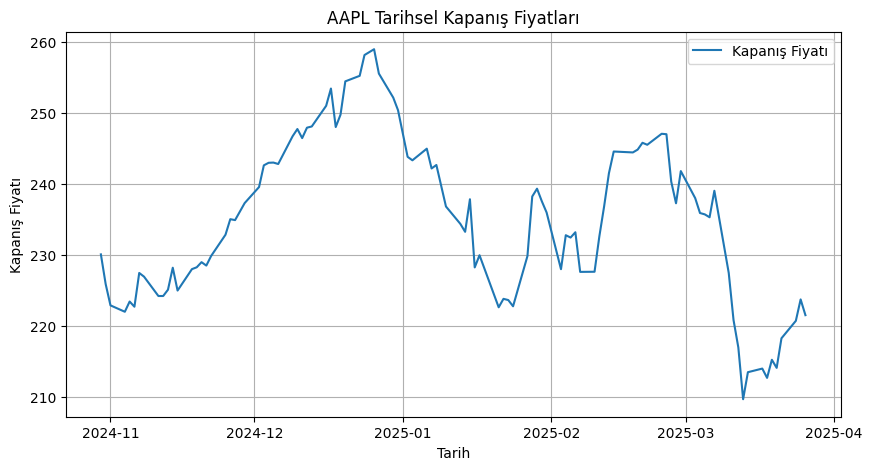

In [ ]:
# Analiz
import requests
import pandas as pd
import matplotlib.pyplot as plt

api_key = "IzYoJXPXvRPjjTuNJzKl69g48zPtWbwP"

def get_quote(ticker):
    url = f"https://financialmodelingprep.com/api/v3/quote/{ticker}?apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Quote verisi çekilirken hata:", response.status_code)
        return None

def get_historical_prices(ticker, timeseries=100):
    url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={api_key}&timeseries={timeseries}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Tarihsel veriler çekilirken hata:", response.status_code)
        return None

if __name__ == "__main__":
    ticker = "AAPL" 
    quote = get_quote(ticker)
    if quote:
        print("Gerçek Zamanlı Fiyat Verisi:")
        print(quote)
    
    historical_data = get_historical_prices(ticker, timeseries=100)
    if historical_data and "historical" in historical_data:
        df = pd.DataFrame(historical_data["historical"])
        df['date'] = pd.to_datetime(df['date'])
        df.sort_values('date', inplace=True)
        print("\nTarihsel Fiyat Verileri (ilk 5 satır):")
        print(df.head())

        # Kapanış fiyatlarını çizdirelim
        plt.figure(figsize=(10,5))
        plt.plot(df['date'], df['close'], label='Kapanış Fiyatı')
        plt.xlabel('Tarih')
        plt.ylabel('Kapanış Fiyatı')
        plt.title(f'{ticker} Tarihsel Kapanış Fiyatları')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Tarihsel veri bulunamadı veya çekilemedi.")


In [ ]:
import finnhub

# Finnhub API key'inizi buraya girin
api_key = ""

# Finnhub Client'ı oluşturun
finnhub_client = finnhub.Client(api_key=api_key)

# Örnek olarak, Apple (AAPL) için gerçek zamanlı fiyat verisini çekelim
quote = finnhub_client.quote("AAPL")
print("Apple Gerçek Zamanlı Fiyat Verisi:")
print(quote)


Apple Gerçek Zamanlı Fiyat Verisi:
{'c': 221.53, 'd': -2.22, 'dp': -0.9922, 'h': 225.02, 'l': 220.47, 'o': 223.51, 'pc': 223.75, 't': 1743019200}


In [24]:
""" 
Scrape the stock transactions from Senator periodic filings.
Not: Bu kod, https://efdsearch.senate.gov üzerinden verileri çekmektedir.
"""

import logging
import time
import pickle
from typing import Any, List, Optional

import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL tanımlamaları
ROOT = 'https://efdsearch.senate.gov'
LANDING_PAGE_URL = f'{ROOT}/search/home/'
SEARCH_PAGE_URL = f'{ROOT}/search/'
REPORTS_URL = f'{ROOT}/search/report/data/'

BATCH_SIZE = 100
RATE_LIMIT_SECS = 2
PDF_PREFIX = '/search/view/paper/'
LANDING_PAGE_FAIL = 'Failed to fetch filings landing page'

REPORT_COL_NAMES = [
    'tx_date',
    'file_date',
    'last_name',
    'first_name',
    'order_type',
    'ticker',
    'asset_name',
    'tx_amount'
]

LOGGER = logging.getLogger(__name__)


def add_rate_limit(func):
    """Decorator: Her çağrıdan önce belirli bir süre bekler."""
    def with_rate_limit(*args, **kwargs):
        time.sleep(RATE_LIMIT_SECS)
        return func(*args, **kwargs)
    return with_rate_limit


def _csrf(client: requests.Session) -> str:
    """
    Oturum için CSRF token'ını alır.
    Oturum sayfasını ziyaret edip, form üzerinden token'ı çekip post eder.
    """
    landing_page_response = client.get(LANDING_PAGE_URL)
    assert landing_page_response.url == LANDING_PAGE_URL, LANDING_PAGE_FAIL

    landing_page = BeautifulSoup(landing_page_response.text, 'lxml')
    csrf_tag = landing_page.find(attrs={'name': 'csrfmiddlewaretoken'})
    if not csrf_tag:
        raise ValueError("CSRF token bulunamadı.")
    form_csrf = csrf_tag['value']
    form_payload = {
        'csrfmiddlewaretoken': form_csrf,
        'prohibition_agreement': '1'
    }
    client.post(LANDING_PAGE_URL,
                data=form_payload,
                headers={'Referer': LANDING_PAGE_URL})

    # Cookie'lerde token anahtarına bakılır
    csrftoken = client.cookies.get('csrftoken', client.cookies.get('csrf'))
    if not csrftoken:
        raise ValueError("CSRF token cookie'leri bulunamadı.")
    return csrftoken


def reports_api(client: requests.Session, offset: int, token: str) -> List[List[str]]:
    """
    Periodic transaction reports API'sini sorgular.
    """
    login_data = {
        'start': str(offset),
        'length': str(BATCH_SIZE),
        'report_types': '[11]',
        'filer_types': '[]',
        'submitted_start_date': '01/01/2012 00:00:00',
        'submitted_end_date': '',
        'candidate_state': '',
        'senator_state': '',
        'office_id': '',
        'first_name': '',
        'last_name': '',
        'csrfmiddlewaretoken': token
    }
    LOGGER.info('Getting rows starting at {}'.format(offset))
    response = client.post(REPORTS_URL,
                           data=login_data,
                           headers={'Referer': SEARCH_PAGE_URL})
    response.raise_for_status()
    return response.json()['data']


def senator_reports(client: requests.Session) -> List[List[str]]:
    """
    Tüm rapor sonuçlarını döner.
    """
    token = _csrf(client)
    idx = 0
    reports = reports_api(client, idx, token)
    all_reports: List[List[str]] = []
    while reports:
        all_reports.extend(reports)
        idx += BATCH_SIZE
        reports = reports_api(client, idx, token)
    return all_reports


def _tbody_from_link(client: requests.Session, link: str) -> Optional[Any]:
    """
    Belirtilen linkteki sayfadan tbody elementini döner.
    Eğer bulunamazsa None döner.
    """
    report_url = f'{ROOT}{link}'
    report_response = client.get(report_url)
    # Eğer sayfa yeniden yönlendirildiyse, CSRF token'ı yenile
    if report_response.url == LANDING_PAGE_URL:
        LOGGER.info('Resetting CSRF token and session cookie')
        _csrf(client)
        report_response = client.get(report_url)
    report = BeautifulSoup(report_response.text, 'lxml')
    tbodies = report.find_all('tbody')
    return tbodies[0] if tbodies else None


def txs_for_report(client: requests.Session, row: List[str]) -> pd.DataFrame:
    """
    Bir rapor satırını, hisse alım-satım işlemleri DataFrame'ine çevirir.
    """
    # Beklenen satır yapısı: [first, last, _, link_html, date_received, ...]
    if len(row) < 5:
        LOGGER.warning("Yetersiz sütun içeren satır: {}".format(row))
        return pd.DataFrame()

    first, last, _, link_html, date_received = row[:5]

    # link HTML içerisinden href çekimi
    soup_link = BeautifulSoup(link_html, 'lxml')
    a_tag = soup_link.find('a')
    if not a_tag:
        LOGGER.warning("Link bulunamadı in row: {}".format(row))
        return pd.DataFrame()

    link = a_tag.get('href')
    if link.startswith(PDF_PREFIX):
        # PDF dosyaları işlenemiyor
        return pd.DataFrame()

    tbody = _tbody_from_link(client, link)
    if not tbody:
        return pd.DataFrame()

    stocks = []
    for table_row in tbody.find_all('tr'):
        cols = [c.get_text(strip=True) for c in table_row.find_all('td')]
        if len(cols) < 8:
            continue  # Beklenen sütun sayısı yoksa atla
        # Sütunların sırası: [?, tx_date, ?, ticker, asset_name, asset_type, order_type, tx_amount, ...]
        tx_date = cols[1]
        ticker = cols[3]
        asset_name = cols[4]
        asset_type = cols[5]
        order_type = cols[6]
        tx_amount = cols[7]
        # Yalnızca 'Stock' varlıkları ya da ticker dolu olanları al
        if asset_type != 'Stock' and ticker.strip() in ('--', ''):
            continue
        stocks.append([
            tx_date,
            date_received,
            last,
            first,
            order_type,
            ticker,
            asset_name,
            tx_amount
        ])
    if stocks:
        df = pd.DataFrame(stocks, columns=REPORT_COL_NAMES)
        return df
    else:
        return pd.DataFrame()


def main() -> pd.DataFrame:
    LOGGER.info('Initializing client')
    client = requests.Session()
    # Rate limit uygulaması: GET ve POST isteklerinde bekleme ekleniyor
    client.get = add_rate_limit(client.get)
    client.post = add_rate_limit(client.post)
    reports = senator_reports(client)
    all_txs_list = []
    for i, row in enumerate(reports):
        if i % 10 == 0:
            LOGGER.info('Fetching report #{}'.format(i))
            total = sum(df.shape[0] for df in all_txs_list)
            LOGGER.info('{} transactions total'.format(total))
        txs = txs_for_report(client, row)
        if not txs.empty:
            all_txs_list.append(txs)
    if all_txs_list:
        all_txs = pd.concat(all_txs_list, ignore_index=True)
    else:
        all_txs = pd.DataFrame()
    return all_txs


if __name__ == '__main__':
    log_format = '[%(asctime)s %(levelname)s] %(message)s'
    logging.basicConfig(level=logging.INFO, format=log_format)
    senator_txs = main()
    LOGGER.info('Dumping to .pickle')
    # Çıktı dizini mevcut değilse oluşturabilirsiniz (örn. "notebooks" klasörünü)
    output_file = 'notebooks/senators.pickle'
    with open(output_file, 'wb') as f:
        pickle.dump(senator_txs, f)
    LOGGER.info('Veriler {} dosyasına kaydedildi.'.format(output_file))

[2025-03-27 11:12:23,777 INFO] Initializing client
[2025-03-27 11:12:28,432 INFO] Getting rows starting at 0
[2025-03-27 11:12:30,810 INFO] Getting rows starting at 100
[2025-03-27 11:12:33,142 INFO] Getting rows starting at 200
[2025-03-27 11:12:35,522 INFO] Getting rows starting at 300
[2025-03-27 11:12:37,892 INFO] Getting rows starting at 400
[2025-03-27 11:12:40,335 INFO] Getting rows starting at 500
[2025-03-27 11:12:42,725 INFO] Getting rows starting at 600
[2025-03-27 11:12:45,011 INFO] Getting rows starting at 700
[2025-03-27 11:12:47,346 INFO] Getting rows starting at 800
[2025-03-27 11:12:49,613 INFO] Getting rows starting at 900
[2025-03-27 11:12:52,009 INFO] Getting rows starting at 1000
[2025-03-27 11:12:54,365 INFO] Getting rows starting at 1100
[2025-03-27 11:12:56,674 INFO] Getting rows starting at 1200
[2025-03-27 11:12:59,075 INFO] Getting rows starting at 1300
[2025-03-27 11:13:01,428 INFO] Getting rows starting at 1400
[2025-03-27 11:13:03,785 INFO] Getting rows st

KeyboardInterrupt: 

In [27]:
import os
import pickle

# Çıktı dizinini tanımlayın
output_dir = 'notebooks'
output_file = os.path.join(output_dir, 'senators.pickle')

# Eğer dizin mevcut değilse oluşturun
os.makedirs(output_dir, exist_ok=True)

with open(output_file, 'wb') as f:
    pickle.dump(senator_txs, f)
LOGGER.info(f"Veriler '{output_file}' dosyasına kaydedildi.")


[2025-03-27 14:46:43,835 INFO] Veriler 'notebooks/senators.pickle' dosyasına kaydedildi.


In [28]:
senator_txs

,tx_date,file_date,last_name,first_name,order_type,ticker,asset_name,tx_amount
0,03/06/2025,03/22/2025,Moody,Ashley,Purchase,--,LLY,"$100,001 - $250,000"
1,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,CRWD PUT,"$1,001 - $15,000"
2,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,CCL PUT,"$1,001 - $15,000"
3,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,OKTA PUT,"$1,001 - $15,000"
4,02/24/2025,03/22/2025,Moody,Ashley,Purchase,--,AMD,"$100,001 - $250,000"
5,02/24/2025,03/22/2025,Moody,Ashley,Sale (Partial),--,SMCI,"$50,001 - $100,000"
6,02/24/2025,03/22/2025,Moody,Ashley,Sale (Partial),--,SMCI,"$15,001 - $50,000"
7,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,HWM,"$50,001 - $100,000"
8,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,AMAT CALL,"$1,001 - $15,000"
9,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,ASML CALL,"$1,001 - $15,000"


In [ ]:
""" 
Scrape the stock transactions from Senator periodic filings for the last year.
Not: Bu kod, https://efdsearch.senate.gov üzerinden verileri çekmektedir.
"""

import logging
import time
import os
from typing import List, Optional, Any
from datetime import datetime, timedelta

import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL tanımlamaları
ROOT = 'https://efdsearch.senate.gov'
LANDING_PAGE_URL = f'{ROOT}/search/home/'
SEARCH_PAGE_URL = f'{ROOT}/search/'
REPORTS_URL = f'{ROOT}/search/report/data/'

BATCH_SIZE = 100
RATE_LIMIT_SECS = 2
PDF_PREFIX = '/search/view/paper/'
LANDING_PAGE_FAIL = 'Failed to fetch filings landing page'

REPORT_COL_NAMES = [
    'tx_date',
    'file_date',
    'last_name',
    'first_name',
    'order_type',
    'ticker',
    'asset_name',
    'tx_amount'
]

LOGGER = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format='[%(asctime)s %(levelname)s] %(message)s')


def add_rate_limit(func):
    """Decorator: Her çağrıdan önce belirli bir süre bekler."""
    def with_rate_limit(*args, **kwargs):
        time.sleep(RATE_LIMIT_SECS)
        return func(*args, **kwargs)
    return with_rate_limit


def _csrf(client: requests.Session) -> str:
    """
    Oturum için CSRF token'ını alır.
    Landing page’i ziyaret edip, form üzerinden token'ı çekip gönderir.
    """
    landing_page_response = client.get(LANDING_PAGE_URL)
    if landing_page_response.url != LANDING_PAGE_URL:
        raise Exception(LANDING_PAGE_FAIL)

    landing_page = BeautifulSoup(landing_page_response.text, 'lxml')
    csrf_tag = landing_page.find(attrs={'name': 'csrfmiddlewaretoken'})
    if not csrf_tag:
        raise ValueError("CSRF token bulunamadı.")
    form_csrf = csrf_tag.get('value')
    form_payload = {
        'csrfmiddlewaretoken': form_csrf,
        'prohibition_agreement': '1'
    }
    client.post(LANDING_PAGE_URL, data=form_payload, headers={'Referer': LANDING_PAGE_URL})

    csrftoken = client.cookies.get('csrftoken', client.cookies.get('csrf'))
    if not csrftoken:
        raise ValueError("CSRF token cookie'leri bulunamadı.")
    return csrftoken


def reports_api(client: requests.Session, offset: int, token: str) -> List[List[str]]:
    """
    Periodic transaction reports API'sini sorgular.
    Sadece son 1 yıla ait verileri çeker.
    """
    now = datetime.now()
    one_year_ago = now - timedelta(days=365)
    login_data = {
        'start': str(offset),
        'length': str(BATCH_SIZE),
        'report_types': '[11]',
        'filer_types': '[]',
        'submitted_start_date': one_year_ago.strftime('%m/%d/%Y 00:00:00'),
        'submitted_end_date': now.strftime('%m/%d/%Y %H:%M:%S'),
        'candidate_state': '',
        'senator_state': '',
        'office_id': '',
        'first_name': '',
        'last_name': '',
        'csrfmiddlewaretoken': token
    }
    LOGGER.info(f'Getting rows starting at offset {offset}')
    response = client.post(REPORTS_URL, data=login_data, headers={'Referer': SEARCH_PAGE_URL})
    response.raise_for_status()
    return response.json()['data']


def senator_reports(client: requests.Session) -> List[List[str]]:
    """
    Tüm rapor sonuçlarını döner.
    Sadece son 1 yıla ait raporlar çekilir.
    """
    token = _csrf(client)
    idx = 0
    reports = reports_api(client, idx, token)
    all_reports: List[List[str]] = []
    while reports:
        all_reports.extend(reports)
        idx += BATCH_SIZE
        reports = reports_api(client, idx, token)
    LOGGER.info(f"Toplam {len(all_reports)} rapor çekildi.")
    return all_reports


def _tbody_from_link(client: requests.Session, link: str) -> Optional[Any]:
    """
    Belirtilen linkteki sayfadan tbody elementini döner.
    Eğer bulunamazsa None döner.
    """
    report_url = f'{ROOT}{link}'
    report_response = client.get(report_url)
    if report_response.url == LANDING_PAGE_URL:
        LOGGER.info("Oturum süresi doldu. CSRF token yenileniyor.")
        _csrf(client)
        report_response = client.get(report_url)
    report = BeautifulSoup(report_response.text, 'lxml')
    tbodies = report.find_all('tbody')
    return tbodies[0] if tbodies else None


def txs_for_report(client: requests.Session, row: List[str]) -> pd.DataFrame:
    """
    Bir rapor satırından hisse alım-satım işlemleri DataFrame'i oluşturur.
    """
    if len(row) < 5:
        LOGGER.warning(f"Yetersiz sütun içeren satır: {row}")
        return pd.DataFrame()
    
    first, last, _, link_html, date_received = row[:5]
    soup_link = BeautifulSoup(link_html, 'lxml')
    a_tag = soup_link.find('a')
    if not a_tag:
        LOGGER.warning(f"Link bulunamadı in row: {row}")
        return pd.DataFrame()

    link = a_tag.get('href')
    if link.startswith(PDF_PREFIX):
        return pd.DataFrame()

    tbody = _tbody_from_link(client, link)
    if not tbody:
        LOGGER.warning(f"tbody bulunamadı: {link}")
        return pd.DataFrame()

    stocks = []
    for table_row in tbody.find_all('tr'):
        cols = [c.get_text(strip=True) for c in table_row.find_all('td')]
        if len(cols) < 8:
            continue
        tx_date = cols[1]
        ticker = cols[3]
        asset_name = cols[4]
        asset_type = cols[5]
        order_type = cols[6]
        tx_amount = cols[7]
        if asset_type != 'Stock' and ticker.strip() in ('--', ''):
            continue
        stocks.append([tx_date, date_received, last, first, order_type, ticker, asset_name, tx_amount])
    
    if stocks:
        return pd.DataFrame(stocks, columns=REPORT_COL_NAMES)
    else:
        return pd.DataFrame()


def main() -> pd.DataFrame:
    LOGGER.info("Client başlatılıyor.")
    client = requests.Session()
    client.get = add_rate_limit(client.get)
    client.post = add_rate_limit(client.post)
    
    reports = senator_reports(client)
    all_txs_list = []
    for i, row in enumerate(reports):
        if i % 10 == 0:
            total = sum(df.shape[0] for df in all_txs_list)
            LOGGER.info(f"Report #{i} işleniyor. Şimdiye kadar {total} işlem çekildi.")
        df = txs_for_report(client, row)
        if not df.empty:
            all_txs_list.append(df)
    
    if all_txs_list:
        all_txs = pd.concat(all_txs_list, ignore_index=True)
    else:
        all_txs = pd.DataFrame()
    
    return all_txs


if __name__ == "__main__":
    senator_txs = main()
    
    # Çıktının kaydedileceği klasörü oluştur
    output_dir = 'notebooks'
    os.makedirs(output_dir, exist_ok=True)
    output_file = f'{output_dir}/senators.csv'
    
    # DataFrame'i CSV dosyasına kaydet (index sütunu eklenmez)
    senator_txs.to_csv(output_file, index=False)
    LOGGER.info(f"Veriler '{output_file}' dosyasına CSV formatında kaydedildi.")


[2025-03-27 14:58:56,635 INFO] Client başlatılıyor.
[2025-03-27 14:59:01,710 INFO] Getting rows starting at offset 0
[2025-03-27 14:59:04,058 INFO] Getting rows starting at offset 100
[2025-03-27 14:59:06,368 INFO] Getting rows starting at offset 200


In [31]:
senator_txs

,tx_date,file_date,last_name,first_name,order_type,ticker,asset_name,tx_amount
0,03/06/2025,03/22/2025,Moody,Ashley,Purchase,--,LLY,"$100,001 - $250,000"
1,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,CRWD PUT,"$1,001 - $15,000"
2,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,CCL PUT,"$1,001 - $15,000"
3,02/24/2025,03/22/2025,Moody,Ashley,Sale (Full),--,OKTA PUT,"$1,001 - $15,000"
4,02/24/2025,03/22/2025,Moody,Ashley,Purchase,--,AMD,"$100,001 - $250,000"
...,...,...,...,...,...,...,...,...
632,03/13/2024,03/29/2024,Carper,Thomas R,Sale (Partial),GLD,SPDR Gold Trust,"$1,001 - $15,000"
633,03/11/2024,03/29/2024,Carper,Thomas R,Sale (Full),ETRN,Equitrans Midstream Corp,"$1,001 - $15,000"
634,03/07/2024,03/29/2024,Carper,Thomas R,Purchase,NVDA,Nvidia Corp,"$1,001 - $15,000"
635,03/07/2024,03/29/2024,Carper,Thomas R,Sale (Partial),AAPL,Apple Inc,"$1,001 - $15,000"
